<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/latest_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
!pip install NBprocessing

In [196]:
from NBprocessing import NBcategorical
from NBprocessing import NBcontinuous
from NBprocessing import NBplot
from NBprocessing import NBgeneral

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

%matplotlib inline

In [197]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [198]:
path = '/gdrive/My Drive/'

In [199]:
data = pd.read_csv(path + 'Copy of train.psv', sep='|')

In [200]:
data.sample(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
220139,101.0,98.0,NaN,143.0,87.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.07,0,1.0,0.0,-0.02,16,0
373503,69.0,91.0,38.17,97.0,61.0,44.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.98,0,NaN,NaN,-379.28,52,0
841418,80.0,95.0,NaN,82.0,76.0,70.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.00,1,0.0,1.0,-5.72,14,0
457625,76.0,NaN,NaN,88.0,56.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.94,1,NaN,NaN,-0.05,32,0
779581,96.0,100.0,NaN,116.0,78.0,59.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.47,0,1.0,0.0,-0.04,55,0


In [201]:
NBgeneral.missing_values(data)

,#Missing_values,%Missing_values
Bilirubin_direct,1165131,99.8
Fibrinogen,1159063,99.3
TroponinI,1159014,99.3
Bilirubin_total,1150776,98.6
Alkalinephos,1148956,98.4
AST,1148690,98.4
EtCO2,1139801,97.7
Lactate,1132987,97.1
PTT,1125284,96.4
SaO2,1120935,96.0


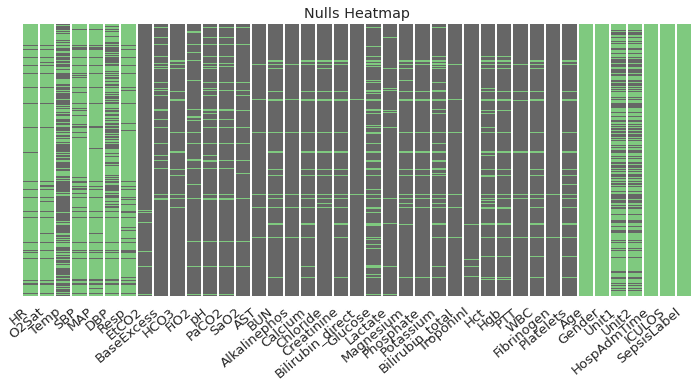

In [202]:
NBplot.plot_missing_value_heatmap(data)

In [203]:
data.shape

(1167202, 41)

In [204]:
data.drop(['EtCO2','SaO2', 'AST', 'Lactate', 'Phosphate', 'PTT'], axis=1, inplace=True)

In [205]:
# aplay "format changer" of the describe features for readability
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Magnesium,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,1.05947e+06,1.01787e+06,394625,993285,1.02953e+06,733099,1.01004e+06,83331,64410,120467,98926,77635,85097,18246,64729,68095,73126,2071,179507,79410,114657,16426,8188,114927,91885,78986,8139,71443,1.1672e+06,1.1672e+06,671221,671221,1.16719e+06,1.1672e+06,1.1672e+06
mean,84.7119,97.2116,36.9935,122.8,81.1642,62.8055,18.7358,-0.670933,24.0825,0.525748,7.37936,41.1079,24.0576,106.21,7.79867,105.803,1.47191,2.11858,136.164,2.04655,4.14496,2.25368,8.69332,30.7694,10.4994,11.6009,289.169,197.579,62.3338,0.566141,0.501945,0.498055,-53.3058,26.7015,0.0192135
std,17.1727,2.92824,0.772304,22.6639,16.0254,13.7156,5.19231,4.29213,4.38679,0.190485,0.073434,9.1268,20.0784,129.827,2.09504,5.91107,1.73259,3.93915,51.6477,0.392202,0.638114,4.58453,25.1239,5.25468,1.88432,7.30269,155.364,105.422,16.2801,0.495606,0.499997,0.499997,149.796,27.7744,0.137275
min,20,20,20.9,20,20,20,1,-32,0,0,6.62,10,1,7,1,26,0.1,0.01,10,0.2,1,0.1,0.01,5.5,2.2,0.1,34,2,14,0,0,0,-3710.66,1,0
25%,72,96,36.5,106,70,53,15,-3,22,0.4,7.34,36,12,55,7.7,102,0.7,0.2,105.5,1.8,3.7,0.5,0.05,27.2,9.2,7.8,184,127,52,0,0,0,-42.68,11,0
50%,84,98,37,120,79,61,18,0,24,0.5,7.38,40,17,75,8.3,106,0.9,0.6,126,2,4.1,0.9,0.4,30.3,10.4,10.5,250,181,64.08,1,1,0,-4.88,21,0
75%,96,99.5,37.5,137,90,70.5,22,1,27,0.6,7.43,45,28.5,111,8.8,109,1.4,2.2,153,2.2,4.5,1.8,5,33.9,11.6,14,351,245,74.96,1,1,1,-0.03,34,0
max,280,100,50,300,300,300,100,100,55,10,7.93,100,268,3833,27.9,145,46.6,37.5,988,9.7,27.5,49.6,440,71.7,32,422.9,1760,1783,100,1,1,1,23.99,336,1


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167202 entries, 0 to 1167201
Data columns (total 35 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   HR                1059467 non-null  float64
 1   O2Sat             1017873 non-null  float64
 2   Temp              394625 non-null   float64
 3   SBP               993285 non-null   float64
 4   MAP               1029532 non-null  float64
 5   DBP               733099 non-null   float64
 6   Resp              1010036 non-null  float64
 7   BaseExcess        83331 non-null    float64
 8   HCO3              64410 non-null    float64
 9   FiO2              120467 non-null   float64
 10  pH                98926 non-null    float64
 11  PaCO2             77635 non-null    float64
 12  BUN               85097 non-null    float64
 13  Alkalinephos      18246 non-null    float64
 14  Calcium           64729 non-null    float64
 15  Chloride          68095 non-null    float64
 16  

In [207]:
#Lets check that all the features have a sufficient amount of data
for feat in data:
    print(f"in feature {feat} the num of unique values is: {data[feat].nunique()}")

in feature HR the num of unique values is: 339
in feature O2Sat the num of unique values is: 144
in feature Temp the num of unique values is: 626
in feature SBP the num of unique values is: 905
in feature MAP the num of unique values is: 940
in feature DBP the num of unique values is: 582
in feature Resp the num of unique values is: 220
in feature BaseExcess the num of unique values is: 347
in feature HCO3 the num of unique values is: 264
in feature FiO2 the num of unique values is: 101
in feature pH the num of unique values is: 102
in feature PaCO2 the num of unique values is: 452
in feature BUN the num of unique values is: 244
in feature Alkalinephos the num of unique values is: 692
in feature Calcium the num of unique values is: 464
in feature Chloride the num of unique values is: 106
in feature Creatinine the num of unique values is: 1200
in feature Bilirubin_direct the num of unique values is: 223
in feature Glucose the num of unique values is: 1050
in feature Magnesium the num of

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



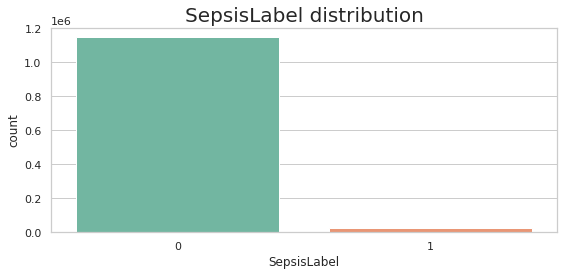

In [208]:
NBplot.count_plot(data,['SepsisLabel'])

In [209]:
data.SepsisLabel.value_counts()

0    1144776
1      22426
Name: SepsisLabel, dtype: int64

In [210]:
data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN', 'Alkalinephos', 'Calcium',
       'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Magnesium',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [211]:
# drop duplicate data
data = data.drop_duplicates()

In [212]:
data.shape

(1166483, 35)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



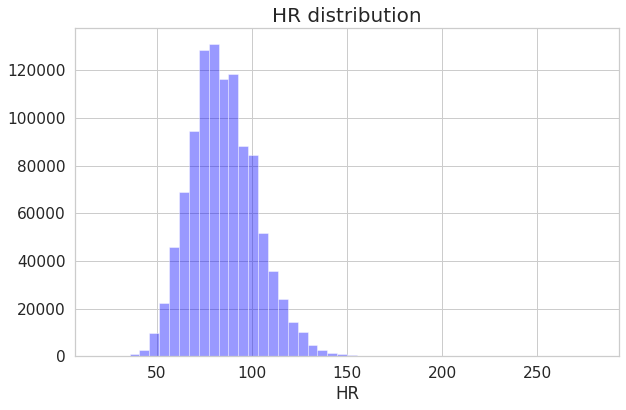

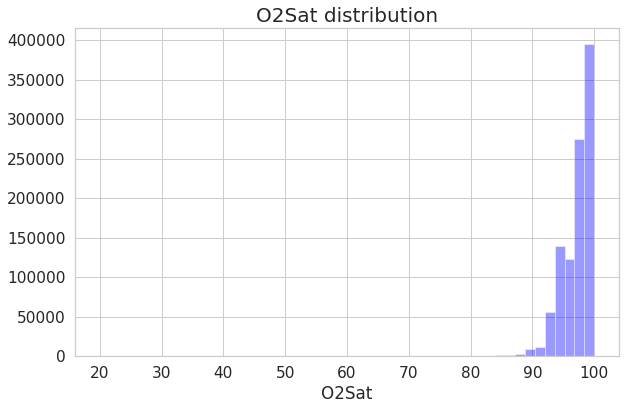

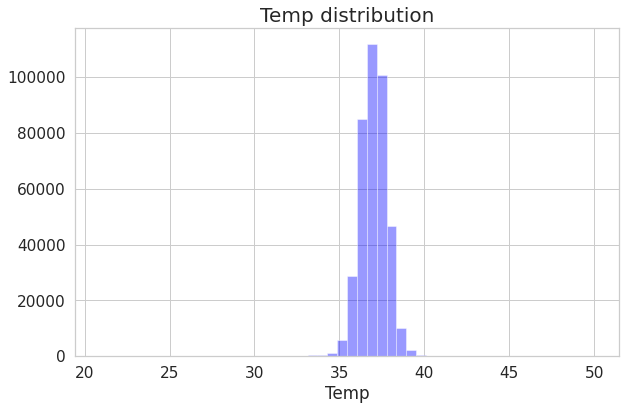

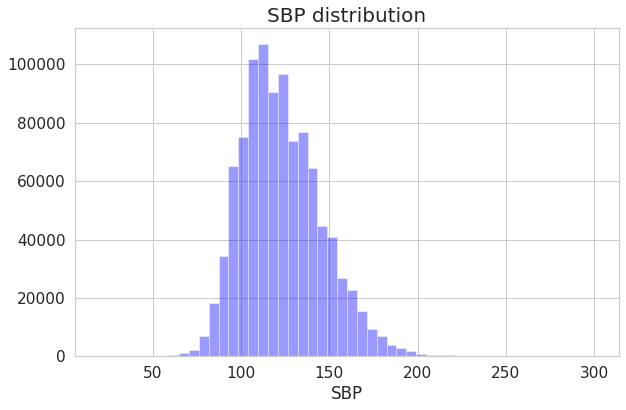

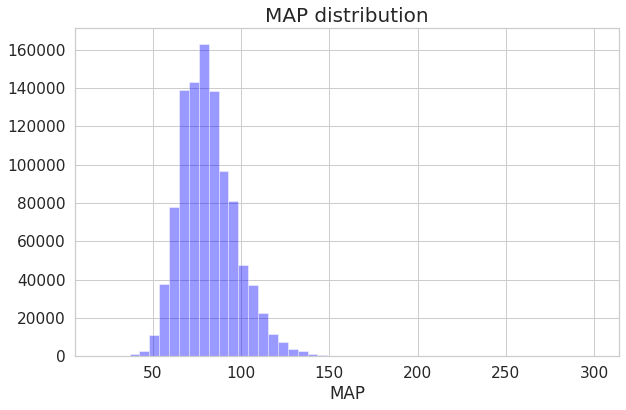

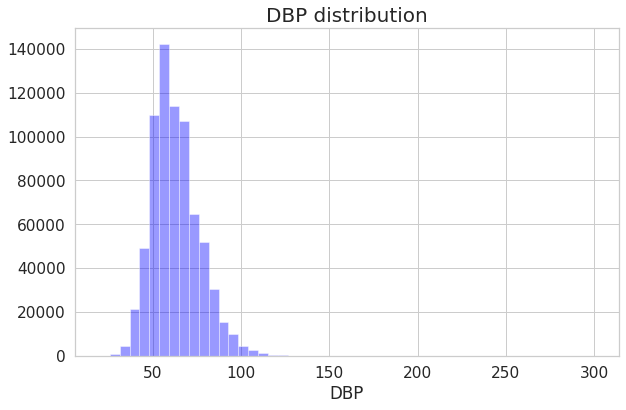

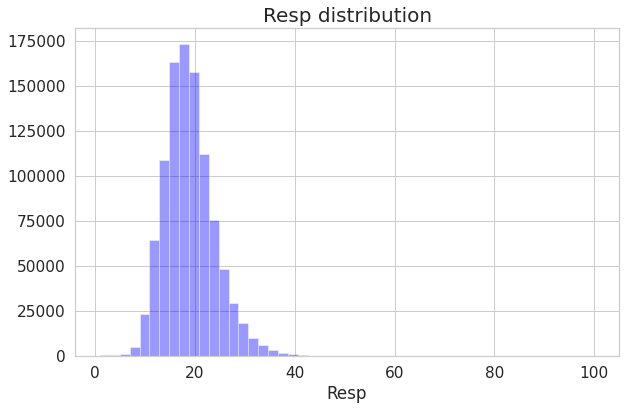

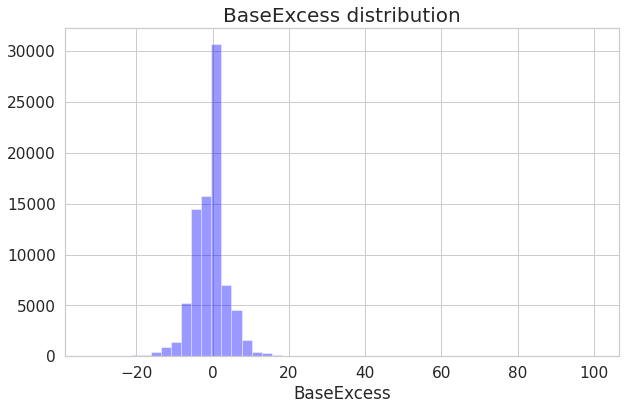

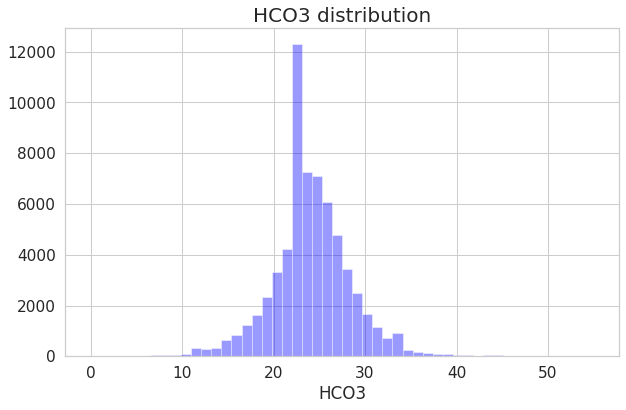

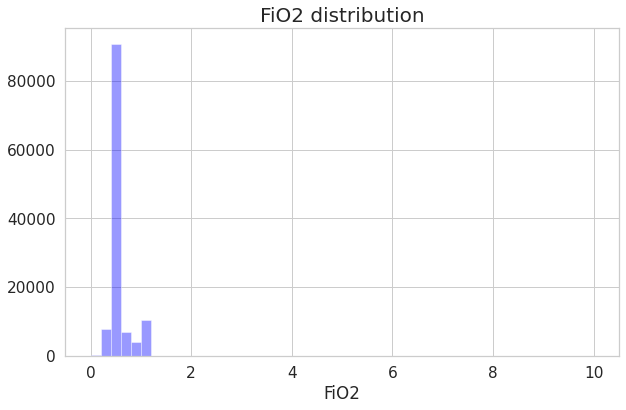

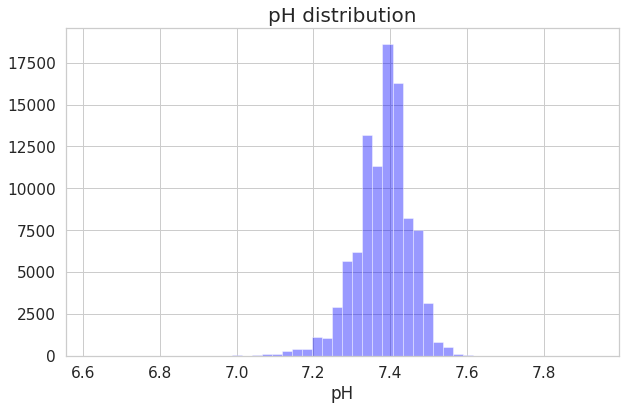

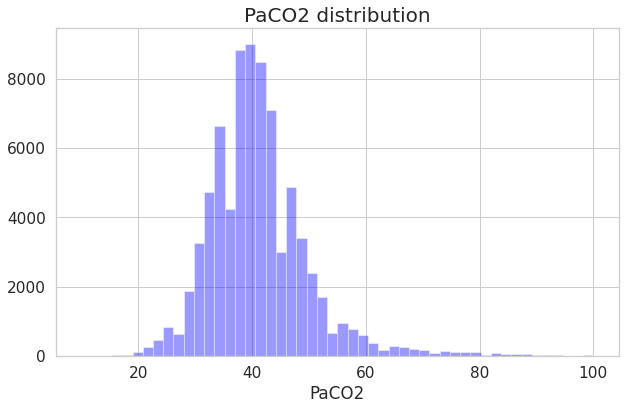

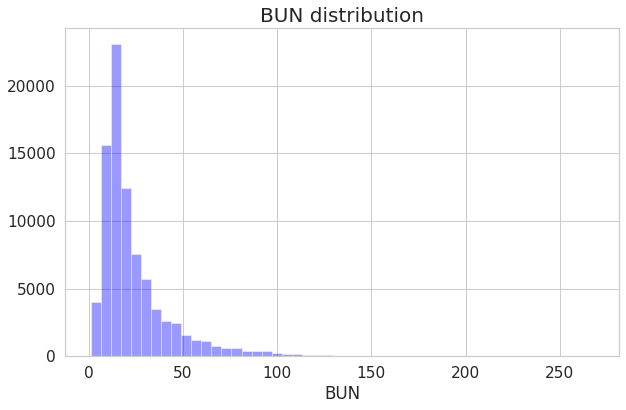

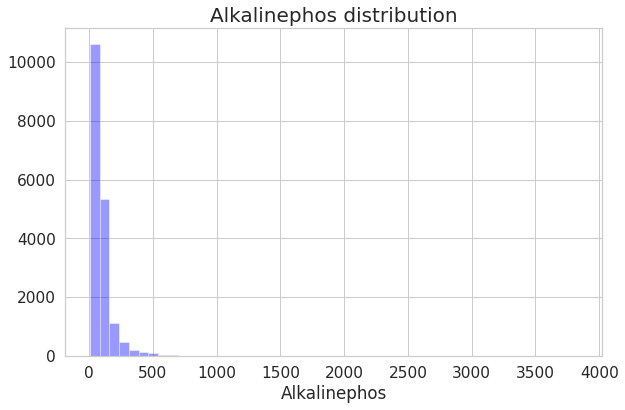

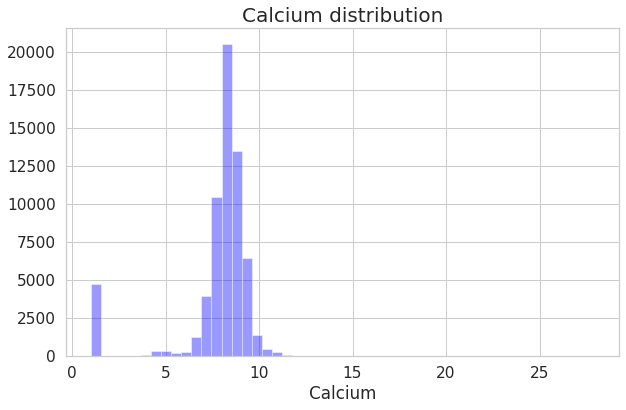

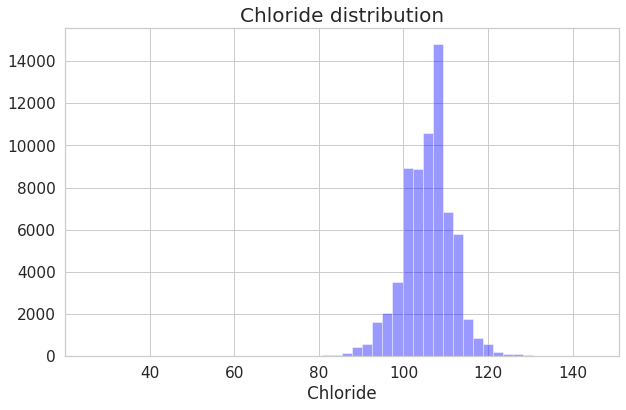

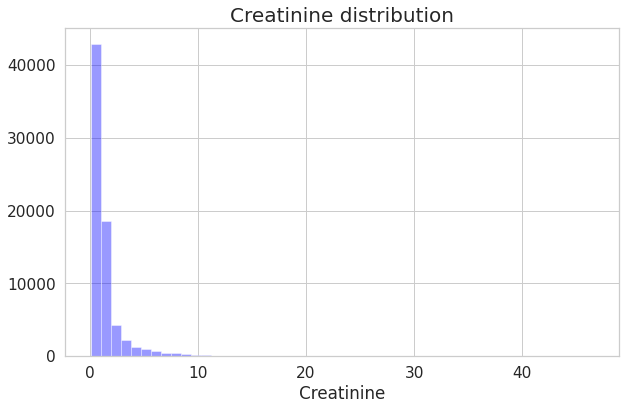

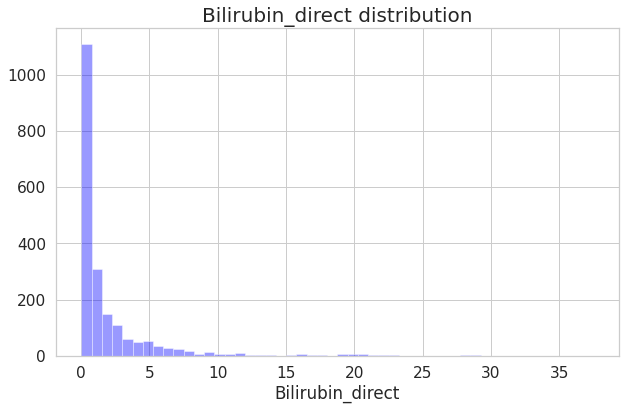

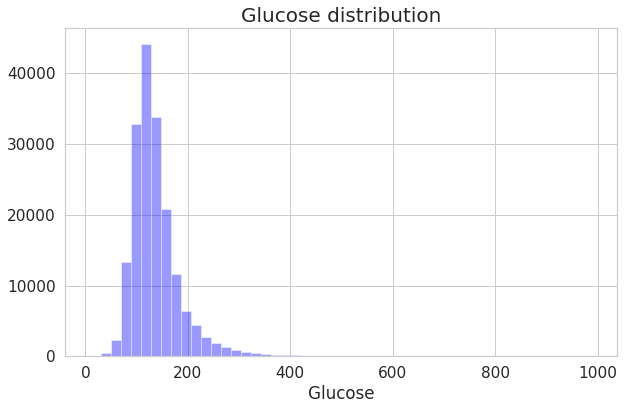

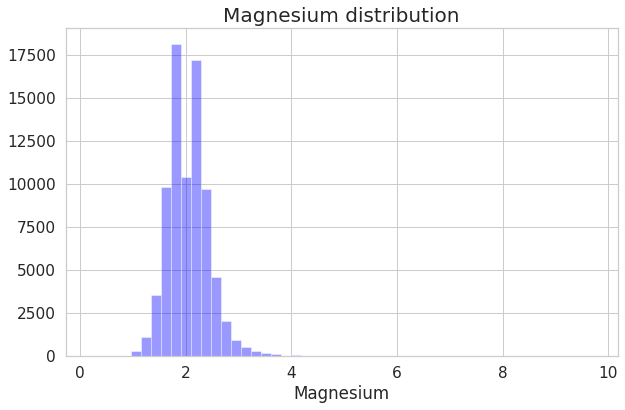

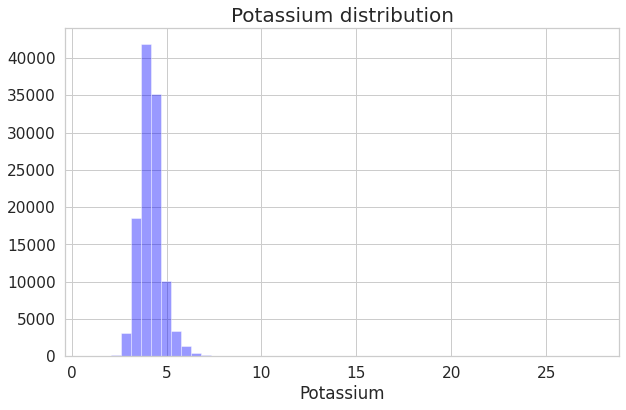

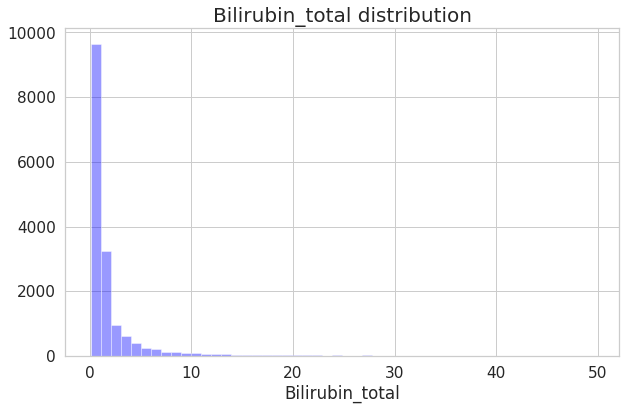

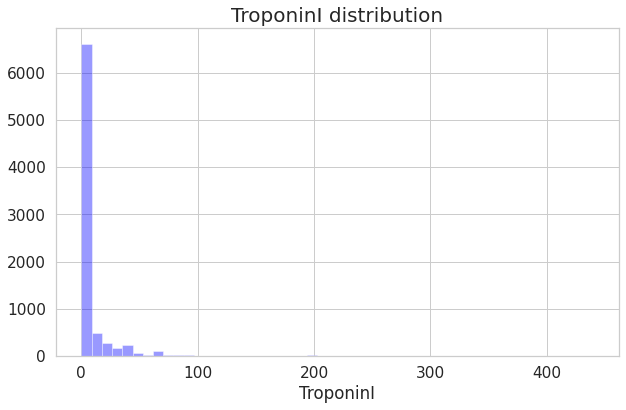

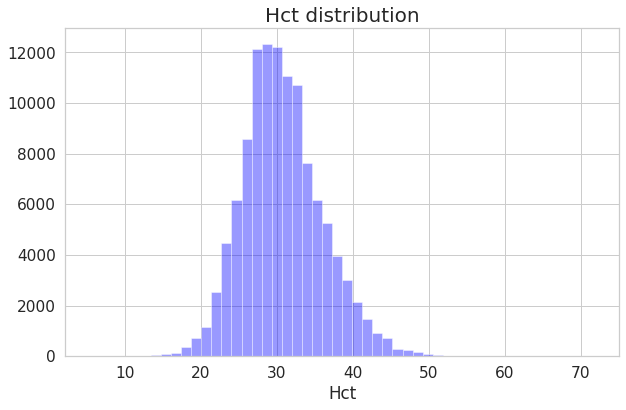

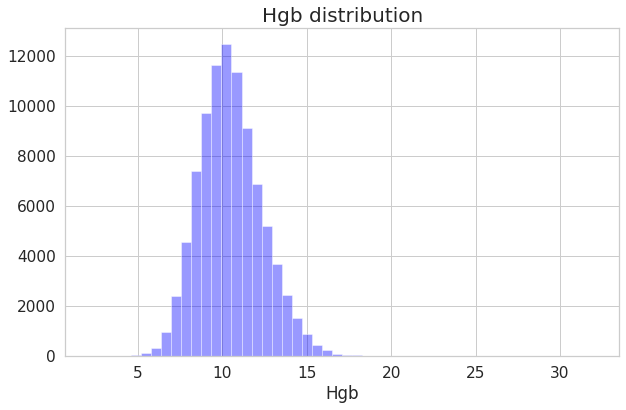

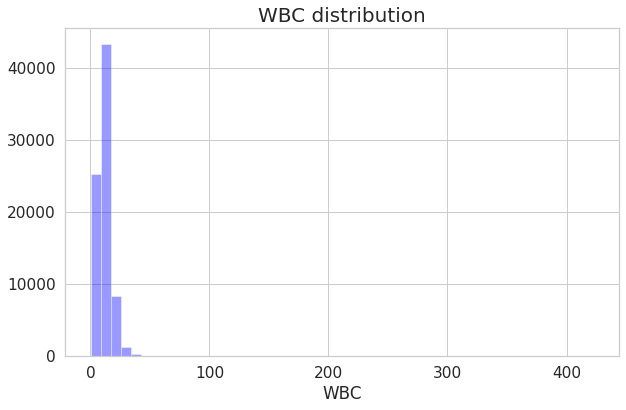

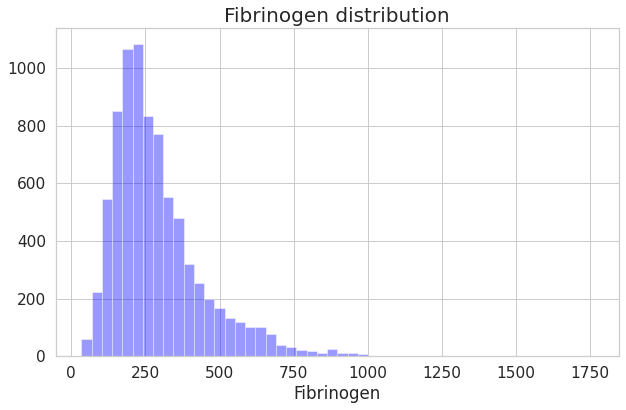

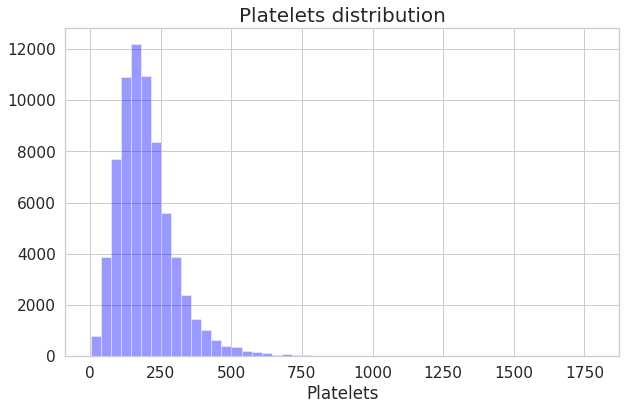

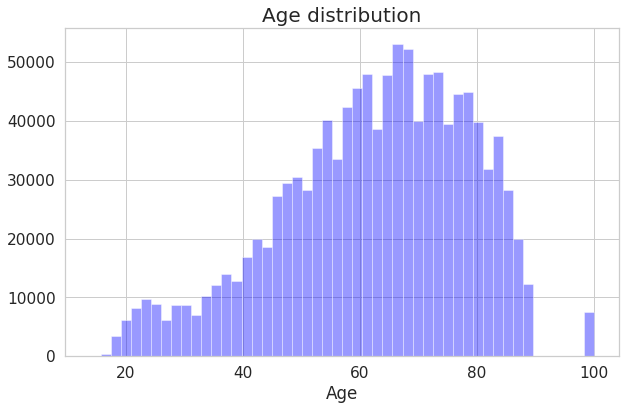

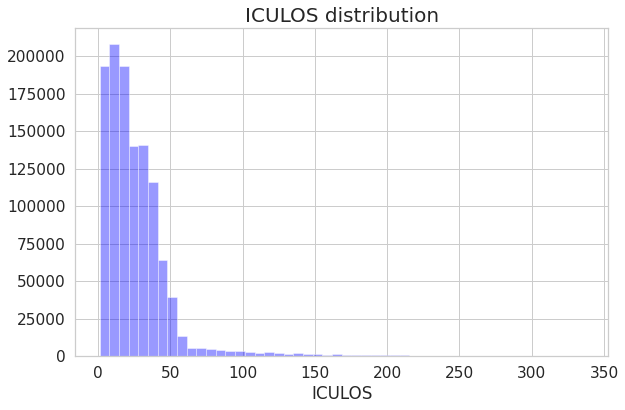

<Figure size 432x288 with 0 Axes>

In [213]:
plot=NBplot.distribution_plot(data,['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets', 'Age','ICULOS'])
plt.savefig(path+'plot.png')

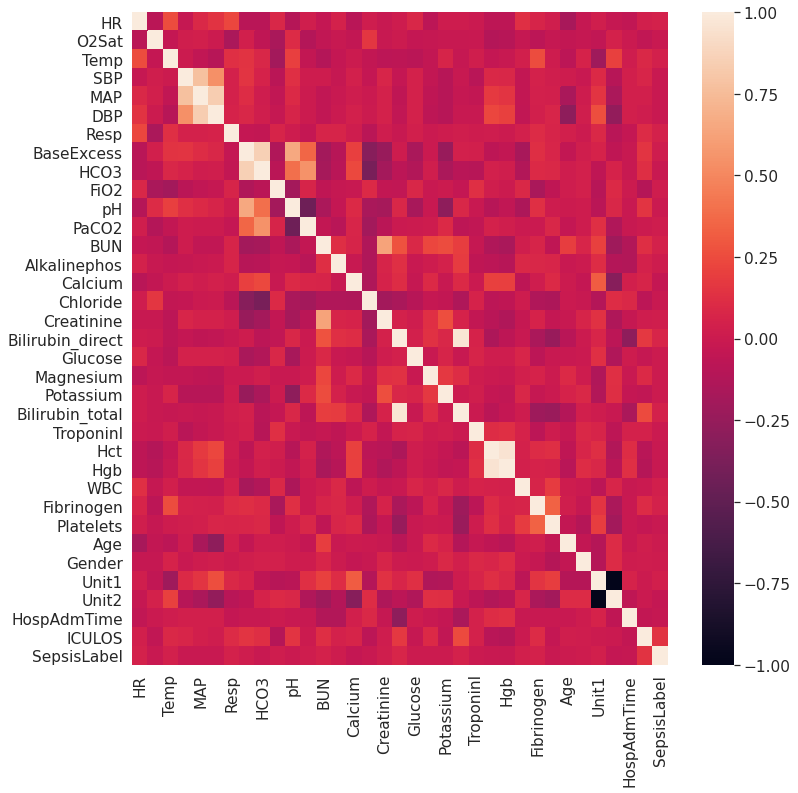

In [214]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr())

In [215]:
# Split data base to train and test sets
X_train, X_test, y_train, y_test = NBgeneral.split_and_check(data,'SepsisLabel',0.2)
START_X_train = len(X_train)

X_train shape: (816538, 34), y_train shape: (816538,), X_test shape: (349945, 34), y_test shape: (349945,)


In [216]:
X_train = pd.concat([X_train,y_train], axis=1)
X_test = pd.concat([X_test,y_test], axis=1)

In [217]:
# Integrity checkto the split
print(f"the length of featuers columns in X_train is {len(X_train)}")
print(f"the length of featuers columns in X_test is {len(X_test)}")
print(f"the length of featuers columns in data base is {len(data)}")
print(f"the delta between all is data sets and data base is :",len(data)-len(X_train)-len(X_test))
print("")
print(f"Number of columns in X_train is {len(X_train.columns)}")
print(f"Number of columns in X_test is {len(X_test.columns)}")
print(f"Number of columns in data base is {len(data.columns)}")

the length of featuers columns in X_train is 816538
the length of featuers columns in X_test is 349945
the length of featuers columns in data base is 1166483
the delta between all is data sets and data base is : 0

Number of columns in X_train is 35
Number of columns in X_test is 35
Number of columns in data base is 35


In [218]:
X_train[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets']].isnull().sum()

HR                   74938
O2Sat               104093
Temp                540289
SBP                 121084
MAP                  95862
DBP                 303291
Resp                109474
BaseExcess          758146
HCO3                771442
FiO2                732259
pH                  747308
PaCO2               762135
BUN                 757006
Alkalinephos        803824
Calcium             771368
Chloride            768914
Creatinine          765451
Bilirubin_direct    815106
Glucose             690953
Magnesium           761036
Potassium           736359
Bilirubin_total     805108
TroponinI           810871
Hct                 736043
Hgb                 752161
WBC                 761243
Fibrinogen          810815
Platelets           766541
dtype: int64

In [219]:
X_train[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets']].median()

HR                   84.00
O2Sat                98.00
Temp                 37.00
SBP                 120.00
MAP                  79.00
DBP                  61.00
Resp                 18.00
BaseExcess            0.00
HCO3                 24.00
FiO2                  0.50
pH                    7.38
PaCO2                40.00
BUN                  17.00
Alkalinephos         75.00
Calcium               8.30
Chloride            106.00
Creatinine            0.90
Bilirubin_direct      0.60
Glucose             126.00
Magnesium             2.00
Potassium             4.10
Bilirubin_total       0.90
TroponinI             0.41
Hct                  30.30
Hgb                  10.40
WBC                  10.50
Fibrinogen          249.00
Platelets           181.00
dtype: float64

In [220]:
X_train[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets']].mean()

HR                   84.723913
O2Sat                97.211400
Temp                 36.994568
SBP                 122.810863
MAP                  81.167577
DBP                  62.797707
Resp                 18.733537
BaseExcess           -0.685532
HCO3                 24.093929
FiO2                  0.526500
pH                    7.379244
PaCO2                41.096644
BUN                  24.087766
Alkalinephos        106.119750
Calcium               7.804542
Chloride            105.798043
Creatinine            1.472235
Bilirubin_direct      2.102095
Glucose             136.171034
Magnesium             2.046662
Potassium             4.143880
Bilirubin_total       2.262808
TroponinI             8.629352
Hct                  30.767221
Hgb                  10.502627
WBC                  11.618409
Fibrinogen          288.686301
Platelets           197.685315
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



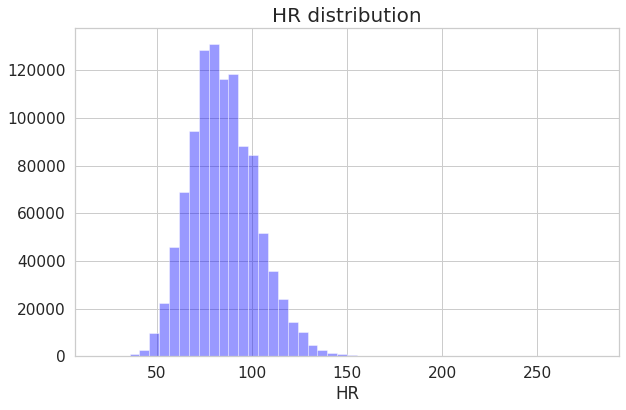

In [221]:
NBplot.distribution_plot(data,['HR'])

In [222]:
X_train.HR.fillna(X_train.HR.median(), inplace=True)
X_train.O2Sat.fillna(X_train.O2Sat.median(), inplace=True)
X_train.Temp.fillna(X_train.Temp.median(), inplace=True)
X_train.SBP.fillna(X_train.SBP.median(), inplace=True)
X_train.MAP.fillna(X_train.MAP.median(), inplace=True)
X_train.DBP.fillna(X_train.DBP.median(), inplace=True)
X_train.Resp.fillna(X_train.Resp.median(), inplace=True)
X_train.BaseExcess.fillna(X_train.BaseExcess.median(), inplace=True)
X_train.HCO3.fillna(X_train.HCO3.median(), inplace=True)
X_train.FiO2.fillna(X_train.FiO2.median(), inplace=True)
X_train.pH.fillna(X_train.pH.median(), inplace=True)
X_train.PaCO2.fillna(X_train.PaCO2.median(), inplace=True)
X_train.Calcium.fillna(X_train.Calcium.median(), inplace=True)
X_train.Chloride.fillna(X_train.Chloride.median(), inplace=True)
X_train.Creatinine.fillna(X_train.Creatinine.median(), inplace=True)
X_train.Magnesium.fillna(X_train.Magnesium.median(), inplace=True)
X_train.Potassium.fillna(X_train.Potassium.median(), inplace=True)
X_train.Hct.fillna(X_train.Hct.median(), inplace=True)
X_train.Hgb.fillna(X_train.Hgb.median(), inplace=True)
X_train.WBC.fillna(X_train.WBC.median(), inplace=True)
X_train.BUN.fillna(X_train.BUN.mean(), inplace=True)
X_train.Alkalinephos.fillna(X_train.Alkalinephos.mean(), inplace=True)
X_train.Bilirubin_direct.fillna(X_train.Bilirubin_direct.mean(), inplace=True)
X_train.Glucose.fillna(X_train.Glucose.mean(), inplace=True)
X_train.Bilirubin_total.fillna(X_train.Bilirubin_total.mean(), inplace=True)
X_train.TroponinI.fillna(X_train.TroponinI.mean(), inplace=True)
X_train.Fibrinogen.fillna(X_train.Fibrinogen.mean(), inplace=True)
X_train.Platelets.fillna(X_train.Platelets.mean(), inplace=True)

In [223]:
X_train[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets']].isnull().sum()

HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Magnesium           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
WBC                 0
Fibrinogen          0
Platelets           0
dtype: int64

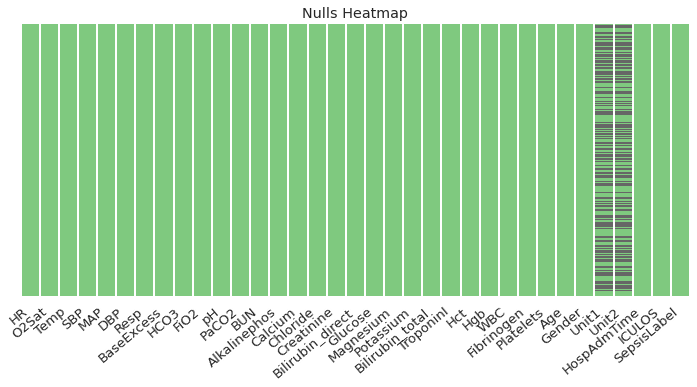

In [224]:
NBplot.plot_missing_value_heatmap(X_train)

In [225]:
X_train.drop(['Unit1', 'Unit2'], axis=1, inplace=True)

In [226]:
X_test.drop(['Unit1', 'Unit2'], axis=1, inplace=True)

In [227]:
X_test.HR.fillna(X_test.HR.median(), inplace=True)
X_test.O2Sat.fillna(X_test.O2Sat.median(), inplace=True)
X_test.Temp.fillna(X_test.Temp.median(), inplace=True)
X_test.SBP.fillna(X_test.SBP.median(), inplace=True)
X_test.MAP.fillna(X_test.MAP.median(), inplace=True)
X_test.DBP.fillna(X_test.DBP.median(), inplace=True)
X_test.Resp.fillna(X_test.Resp.median(), inplace=True)
X_test.BaseExcess.fillna(X_test.BaseExcess.median(), inplace=True)
X_test.HCO3.fillna(X_test.HCO3.median(), inplace=True)
X_test.FiO2.fillna(X_test.FiO2.median(), inplace=True)
X_test.pH.fillna(X_test.pH.median(), inplace=True)
X_test.PaCO2.fillna(X_test.PaCO2.median(), inplace=True)
X_test.Calcium.fillna(X_test.Calcium.median(), inplace=True)
X_test.Chloride.fillna(X_test.Chloride.median(), inplace=True)
X_test.Creatinine.fillna(X_test.Creatinine.median(), inplace=True)
X_test.Magnesium.fillna(X_test.Magnesium.median(), inplace=True)
X_test.Potassium.fillna(X_test.Potassium.median(), inplace=True)
X_test.Hct.fillna(X_test.Hct.median(), inplace=True)
X_test.Hgb.fillna(X_test.Hgb.median(), inplace=True)
X_test.WBC.fillna(X_test.WBC.median(), inplace=True)
X_test.BUN.fillna(X_test.BUN.mean(), inplace=True)
X_test.Alkalinephos.fillna(X_test.Alkalinephos.mean(), inplace=True)
X_test.Bilirubin_direct.fillna(X_test.Bilirubin_direct.mean(), inplace=True)
X_test.Glucose.fillna(X_test.Glucose.mean(), inplace=True)
X_test.Bilirubin_total.fillna(X_test.Bilirubin_total.mean(), inplace=True)
X_test.TroponinI.fillna(X_test.TroponinI.mean(), inplace=True)
X_test.Fibrinogen.fillna(X_test.Fibrinogen.mean(), inplace=True)
X_test.Platelets.fillna(X_test.Platelets.mean(), inplace=True)

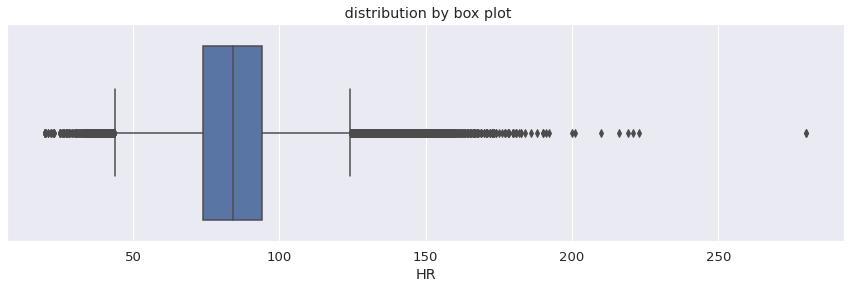

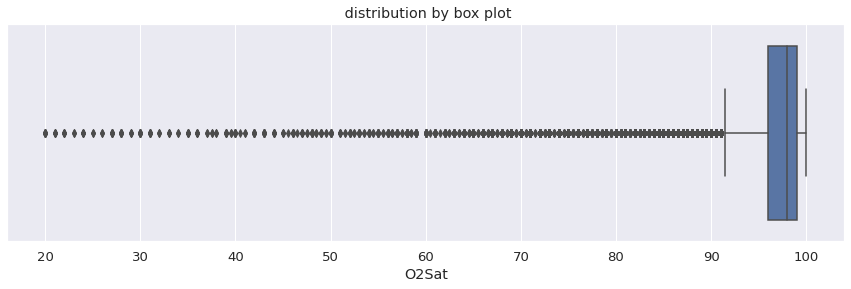

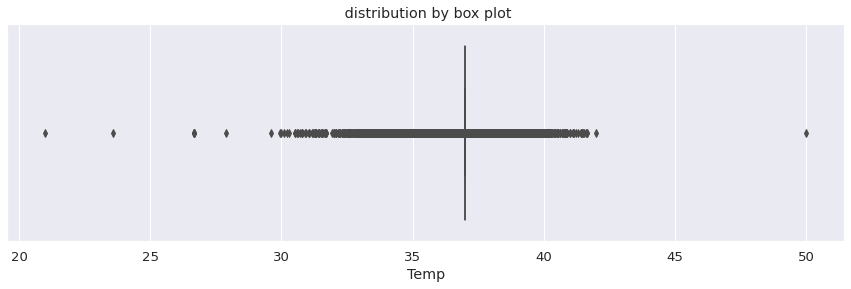

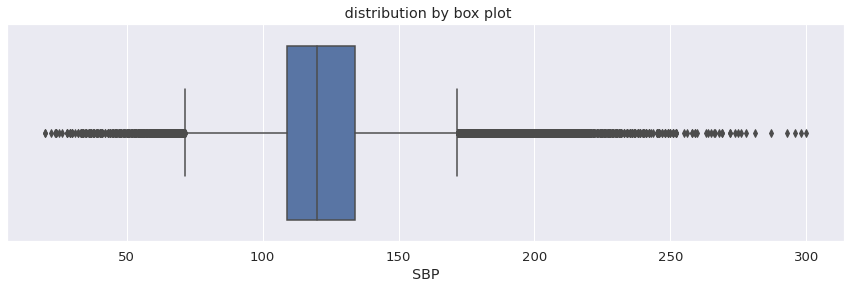

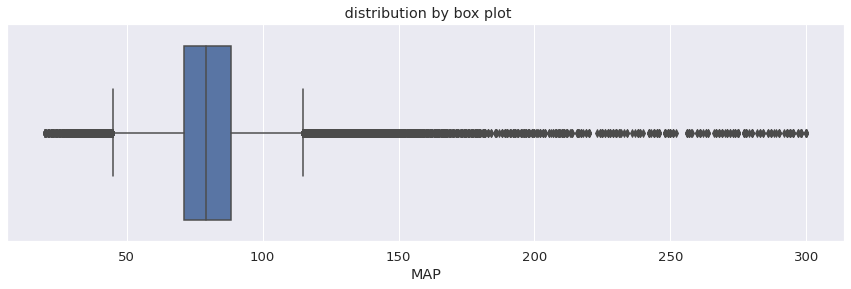

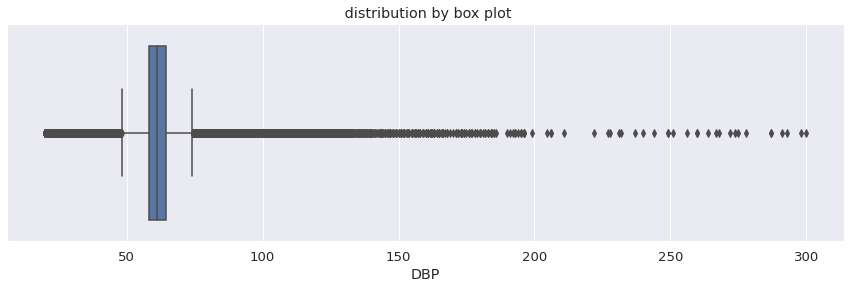

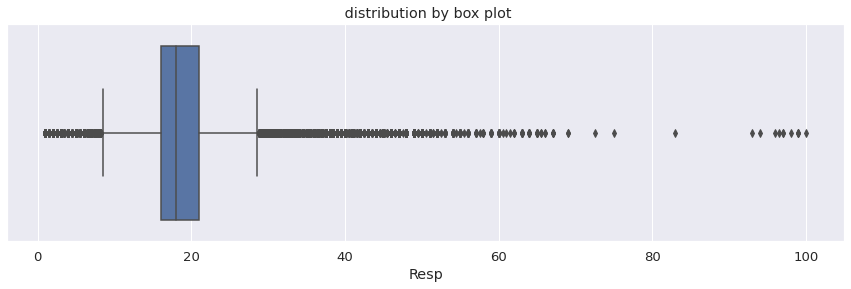

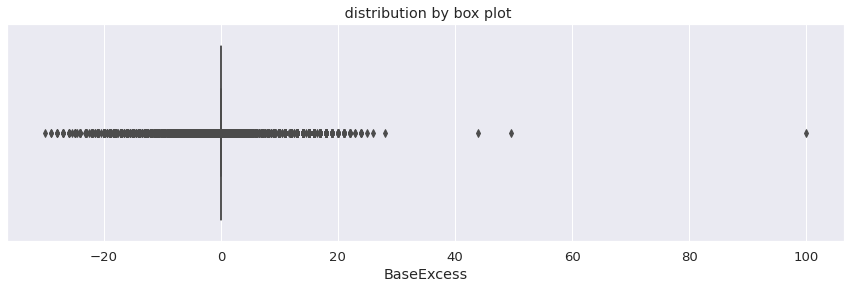

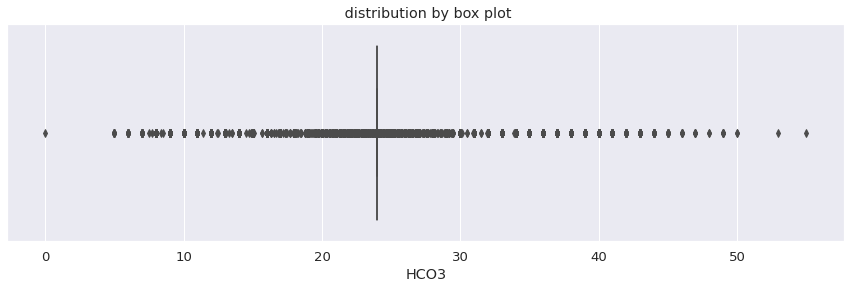

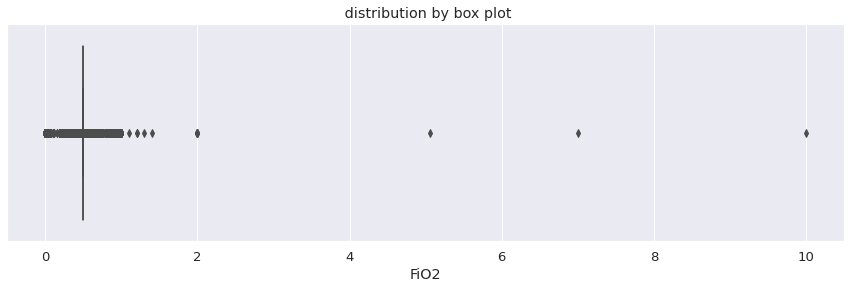

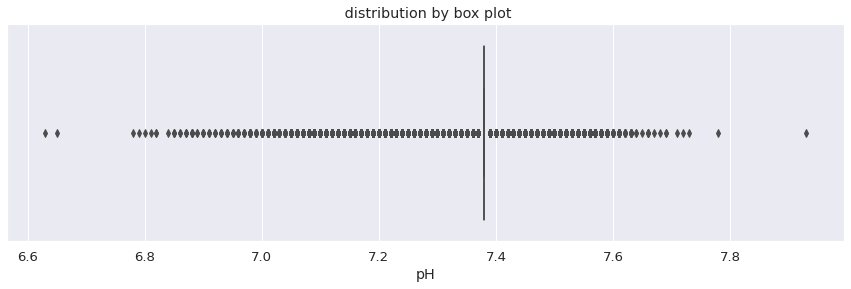

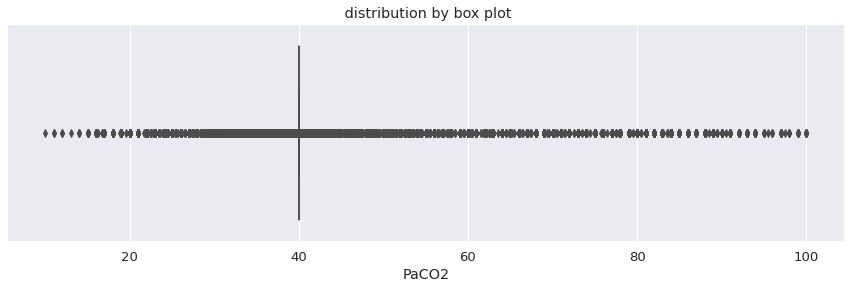

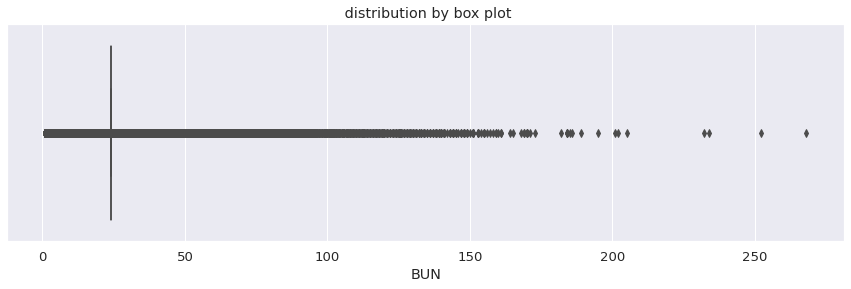

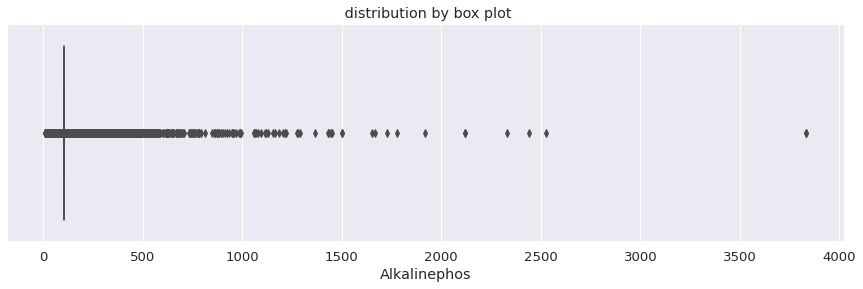

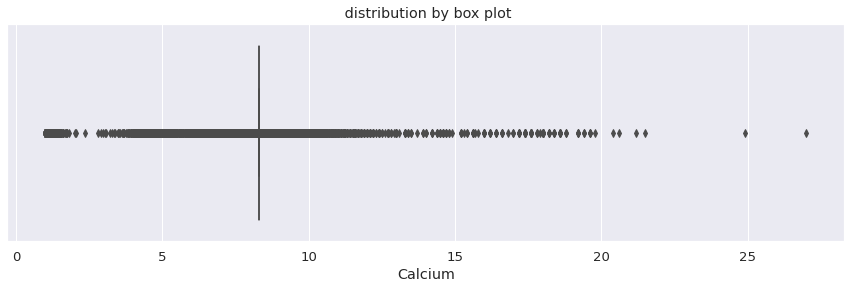

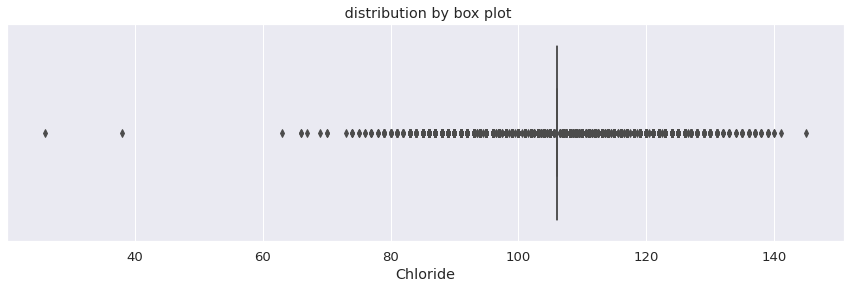

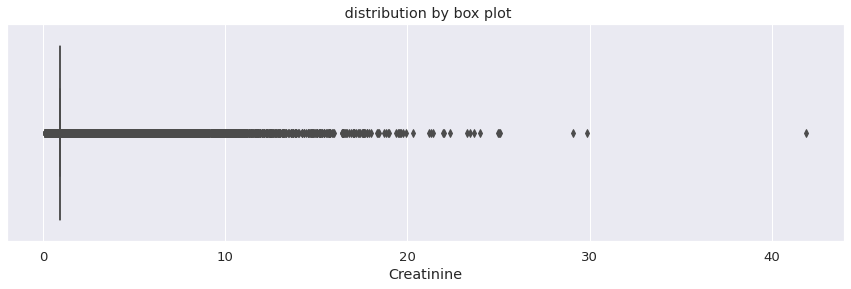

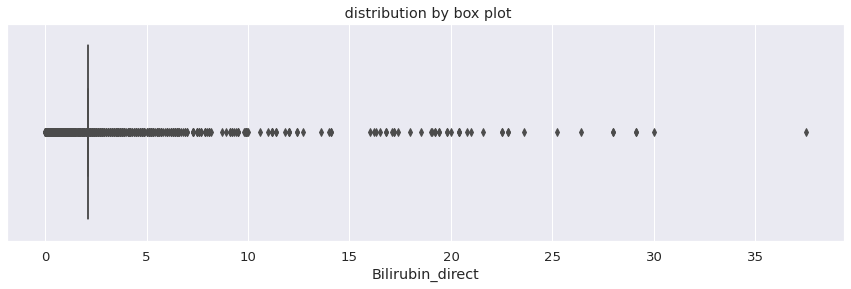

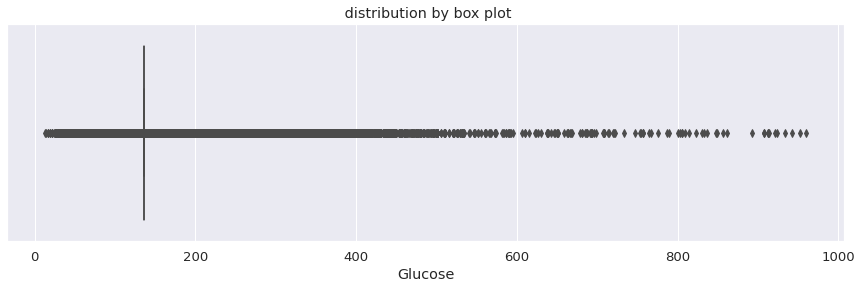

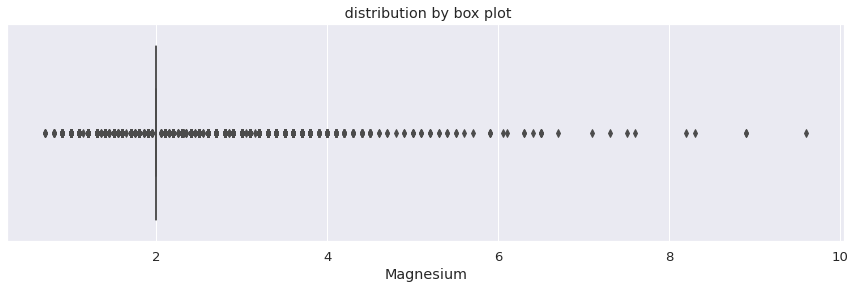

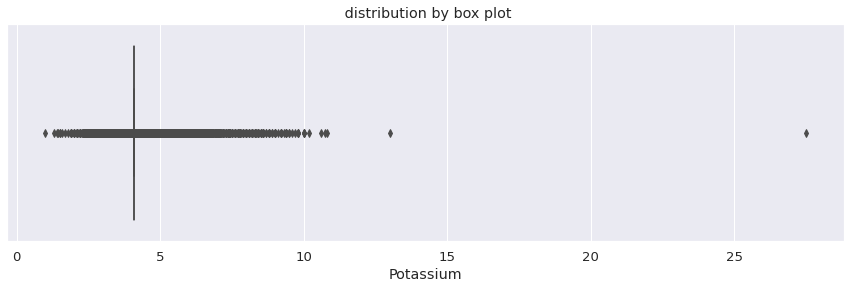

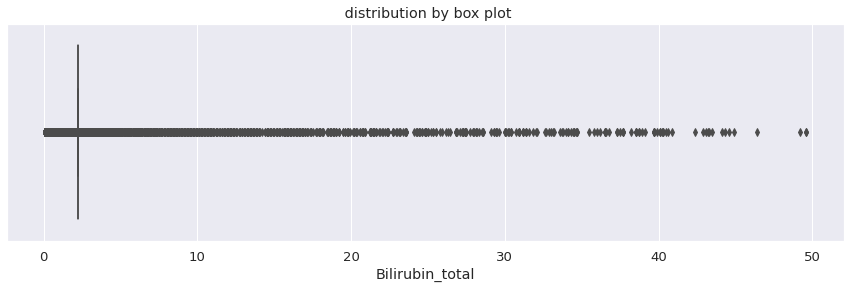

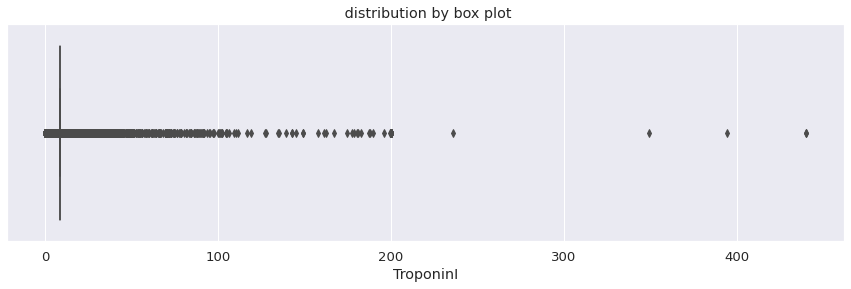

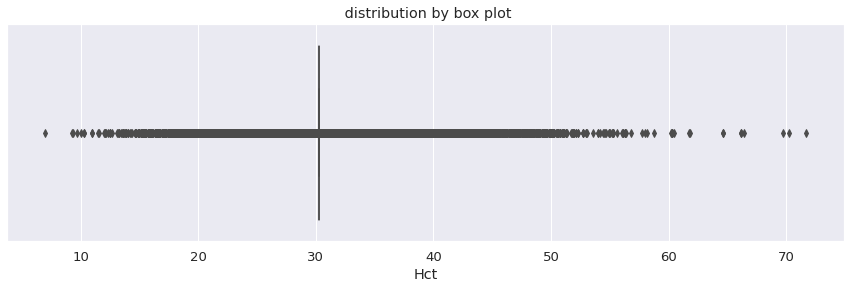

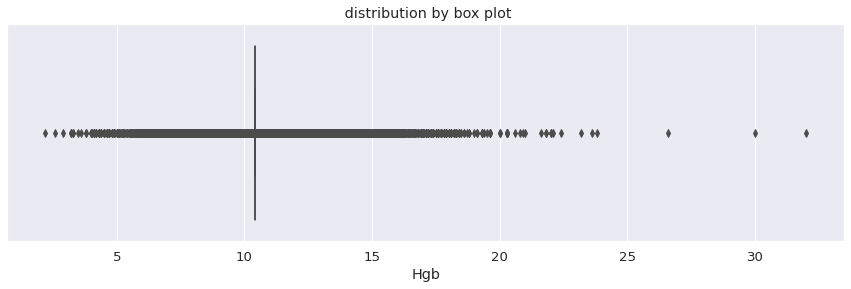

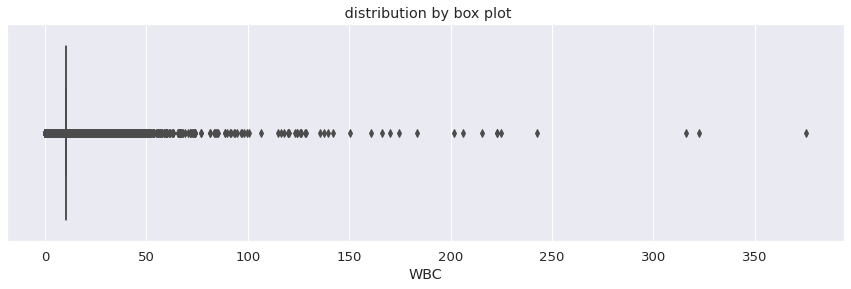

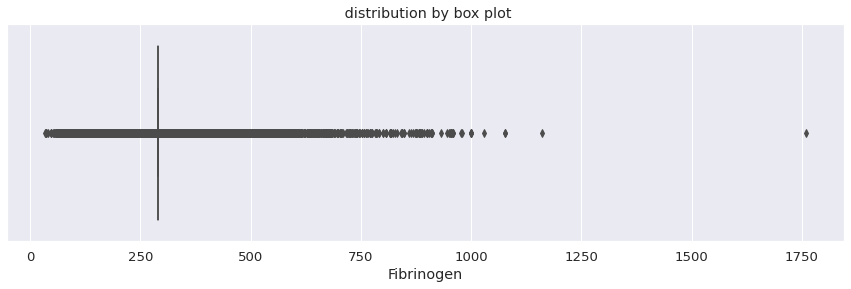

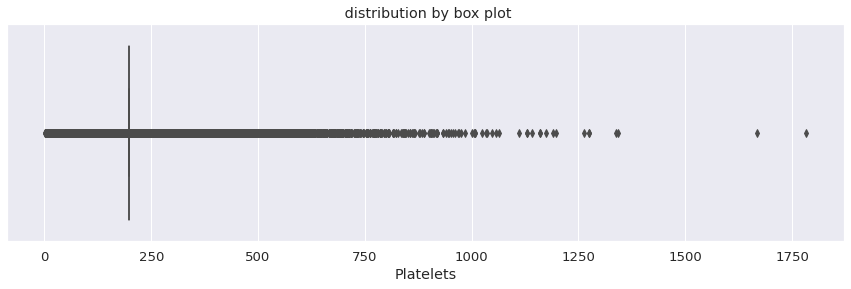

In [228]:
for col in ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Magnesium', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Fibrinogen', 'Platelets']:
    plt.figure(figsize=(15,4))
    g = sns.boxplot(x=X_train[col])
    g.set(title=" distribution by box plot")
    plt.show()

In [230]:
X_train.to_csv(path+'X_train.csv')

In [232]:
y_train.to_csv(path +'y_train.csv')
X_test.to_csv(path + 'X_test.csv')
y_test.to_csv(path +'y_test.csv')

In [164]:
print(X_train['HR'].quantile(0.10))
print(X_train['HR'].quantile(0.90))

64.0
106.0


In [165]:
X_train["HR"] = np.where(X_train["HR"] <64.0, 64.0,X_train['HR'])
X_train["HR"] = np.where(X_train["HR"] >106.0, 106.0,X_train['HR'])
print(X_train['HR'].skew())

0.11827573747309682


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



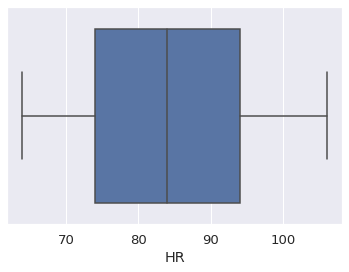

In [166]:
sns.boxplot(X_train['HR'])

In [167]:
print(X_train['O2Sat'].quantile(0.10))
print(X_train['O2Sat'].quantile(0.90))

94.0
100.0


In [168]:
X_train["O2Sat"] = np.where(X_train["O2Sat"] <94.0, 94.0,X_train['O2Sat'])
X_train["O2Sat"] = np.where(X_train["O2Sat"] >100.0, 100.0,X_train['O2Sat'])
print(X_train['O2Sat'].skew())

-0.42295804469035414


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



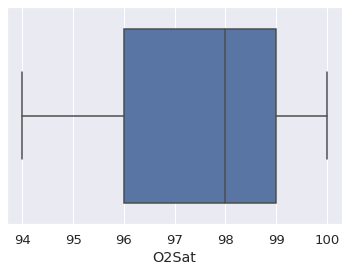

In [169]:
sns.boxplot(X_train['O2Sat'])

In [170]:
print(X_train['SBP'].quantile(0.10))
print(X_train['SBP'].quantile(0.90))

97.5
151.0


In [171]:
X_train["SBP"] = np.where(X_train["SBP"] <97.5, 97.5,X_train['SBP'])
X_train["SBP"] = np.where(X_train["SBP"] >151.0, 151.0,X_train['SBP'])
print(X_train['SBP'].skew())

0.29743922086057695


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



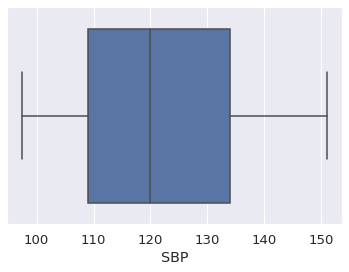

In [172]:
sns.boxplot(X_train['SBP'])

In [173]:
print(X_train['Temp'].quantile(0.25))
print(X_train['Temp'].quantile(0.75))

36.6
37.4


In [192]:
X_train["Temp"] = np.where(X_train["Temp"] <37.0, 37.0,X_train['Temp'])
X_train["Temp"] = np.where(X_train["Temp"] >37.6, 37.6,X_train['Temp'])
print(X_train['Temp'].skew())

0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



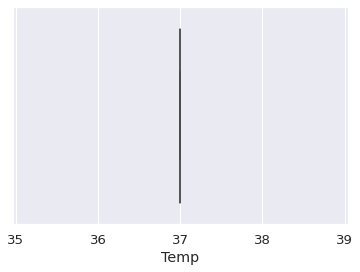

In [193]:
sns.boxplot(X_train['Temp'])

In [176]:
print(X_train['MAP'].quantile(0.10))
print(X_train['MAP'].quantile(0.90))

64.0
100.33


In [177]:
X_train["MAP"] = np.where(X_train["MAP"] <64.0, 64.0,X_train['MAP'])
X_train["MAP"] = np.where(X_train["MAP"] >100.33, 100.33,X_train['MAP'])
print(X_train['MAP'].skew())

0.3114018739706506


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



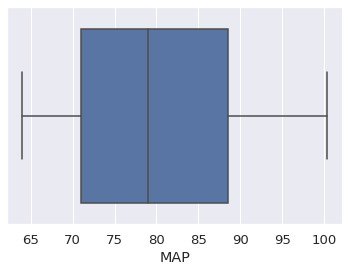

In [178]:
sns.boxplot(X_train['MAP'])

In [179]:
print(X_train['DBP'].quantile(0.10))
print(X_train['DBP'].quantile(0.90))

50.0
76.0


In [184]:
X_train["DBP"] = np.where(X_train["DBP"] <50.0, 50.0,X_train['DBP'])
X_train["DBP"] = np.where(X_train["DBP"] >74.0, 74.0,X_train['DBP'])
print(X_train['DBP'].skew())

0.23824208338546105


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



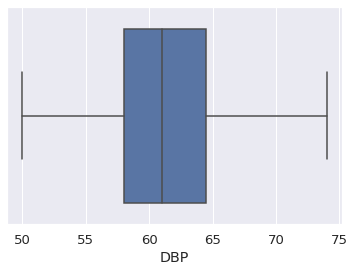

In [185]:
sns.boxplot(X_train['DBP'])

In [194]:
print(X_train['Resp'].quantile(0.10))
print(X_train['Resp'].quantile(0.90))

13.0
25.0
